# Create and load scenarios

This tutorial explains how to use PySTK to create and load STK scenarios. PySTK can automate the setup of complex scenarios, load existing scenarios, and interact with various objects within STK, such as satellites, aircraft, and ground stations. Configure and analyze scenarios without needing to manually input data or interact with the STK graphical user interface.

## Create a new STK scenario

To create a new scenario, first connect to STK. This tutorial uses STK Engine.

In [1]:
from ansys.stk.core.stkengine import STKEngine


# Connect to the STK Application object
stk = STKEngine.start_application(no_graphics=False)
print(f"Using {stk.version}")

Using STK Engine v12.10.0


This creates an instance of the STK application. Setting `no_graphics` to `False` opens the STK window.

Next, it's time to create a scenario.

In [2]:
# Create a new scenario
root = stk.new_object_root()
root.new_scenario("MyScenario")

This creates a new scenario in STK named "MyScenario."

In [3]:
scenario = root.current_scenario
print(scenario.path)

/Application/STK/Scenario/MyScenario


## Create objects in a scenario
After creating (or loading) the scenario, PySTK enables the creation and manipulation of objects like satellites, aircraft, or ground stations. For example, to add a satellite:

In [4]:
from ansys.stk.core.stkobjects import STKObjectType


# Create a satellite in the scenario
satellite = scenario.children.new(STKObjectType.SATELLITE, "MySatellite")

To set the satellite's orbit and to set a propagator type:

In [5]:
from ansys.stk.core.stkobjects import PropagatorType


# Set the satellite's orbit (assuming you want a basic orbit definition)
satellite.set_propagator_type(PropagatorType.SGP4)  # Using SGP4 propagator
propagator = satellite.propagator
propagator.propagate()  # To propagate the orbit

## Display the scenario

It is possible to display the created scenario by using PySTK widgets for Jupyter:

RFBOutputContext()

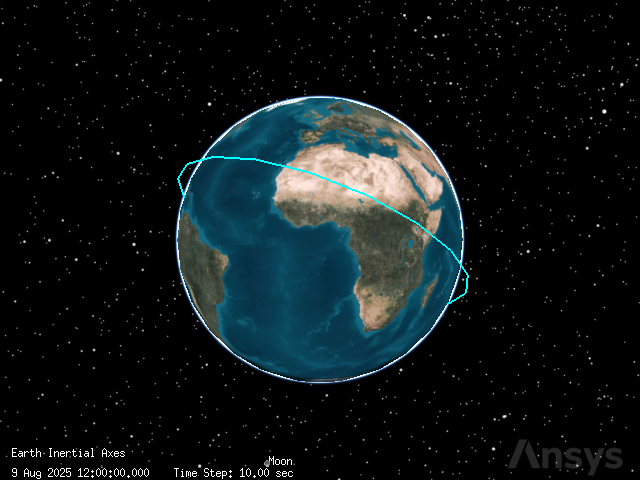

In [6]:
from ansys.stk.core.stkengine.experimental.jupyterwidgets import GlobeWidget


plotter = GlobeWidget(root, 640, 480)
plotter.show()

## Save a scenario

Now save the scenario along with all added objects using PySTK.

In [7]:
from pathlib import Path


# Create a directory for scenario files
scenario_directory = Path.cwd() / "scenario" / "MyScenario"
scenario_directory.mkdir(parents=True, exist_ok=True)

# Save the scenario
scenario_path = scenario_directory / "MyScenario.sc"
root.save_as(str(scenario_path))
root.close_scenario()

## Load an existing scenario

Load an existing scenario by opening the SC (scenario) file:

In [8]:
# Open an existing scenario
scenario = root.load_scenario(str(scenario_path))

## Close the STK application

After you're done, you can close the STK application:

In [9]:
# Close the STK application
stk.shutdown()